## 3D surface

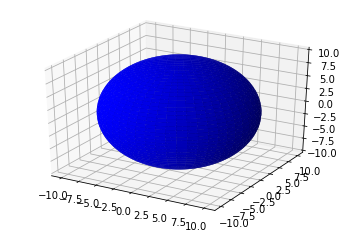

In [1]:
'''
========================
3D surface (solid color)
========================

Demonstrates a very basic plot of a 3D surface using a solid color.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()


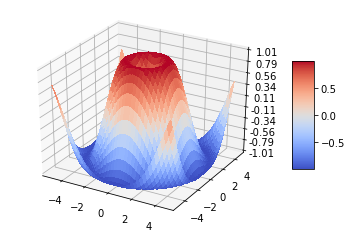

In [2]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [119]:
from scipy.interpolate import griddata
numcols, numrows = 30, 30 

data = pd.read_csv("../../output/coverages_0,0006666666666666666_lambda.csv")

xi = np.linspace(data.lon.min(), data.lon.max(), numrows)
yi = np.linspace(data.lat.min(), data.lat.max(), numcols)
xi, yi = np.meshgrid(xi, yi)
x, y, z = data.lon, data.lat, data.probability


0       0.998667
1       0.980945
2       0.953191
3       0.962126
4       0.984073
          ...   
2987    0.474368
2988    0.000000
2989    0.000000
2990    0.000000
2991    0.877384
Name: probability, Length: 2992, dtype: float64

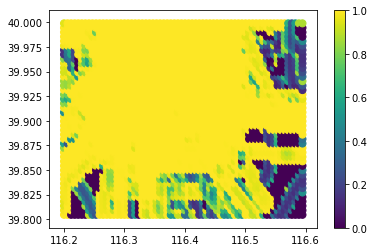

In [118]:
points = np.vstack((x,y)).T 
values = z
wanted = (xi, yi)
zi = griddata(points, values, wanted) # for more info on griddata: http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# from here its the same code again as you had
plt.figure()
plt.contourf(xi, yi, zi)
plt.scatter(data.lon, data.lat, c=data.probability, s=50, vmin=zi.min(), vmax=zi.max())
plt.colorbar()
plt.show()

## Plot coverage by interpolating a meshgrid (3d and heatmap)
- load long lat
- create the meshgrid as a square box of X tiles side
- interpolate the meshgrid with the griddata in order to get all the Z values also for missing locations

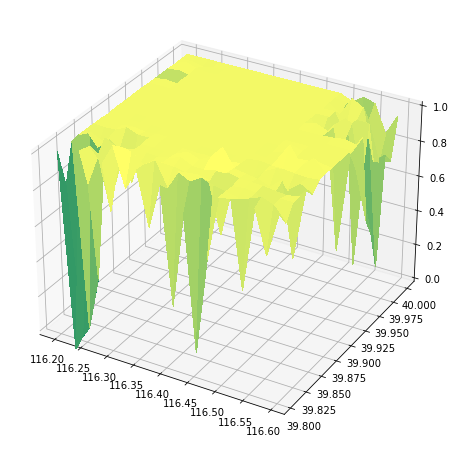

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
numcols, numrows = 20, 20

fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')

filename = "../../../../../datasets/mobility/Geolife_Trajectories_1.3/Data/coverages_0,0033333333333333335_lambda.csv"

data = pd.read_csv(filename)

xi = np.linspace(data.lon.min(), data.lon.max(), numrows)
yi = np.linspace(data.lat.min(), data.lat.max(), numcols)
xi, yi = np.meshgrid(xi, yi)
x, y, z = data.lon, data.lat, data.probability


# known points (long, lat)
points = np.vstack((x,y)).T 
# known z points
values = z
# all the points I want to interpolate
wanted = (xi, yi)
# meshgrid interpolated
zi = griddata(points, values, wanted,method="cubic") 

surf = ax.plot_surface(xi, yi, zi, cmap=cm.summer,
                       linewidth=0, antialiased=False,shade=True)

ax.set_zlim(0, 1)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

        
plt.savefig("../../output/3D_grid.png", dpi  = 300)




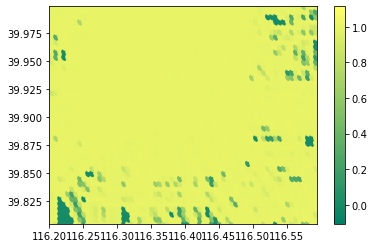

In [37]:
plt.contourf(xi, yi, zi)
plt.scatter(data.lon, data.lat, c=data.probability, s=50, vmin=zi.min(), vmax=zi.max(),cmap=cm.summer)
plt.colorbar()
plt.savefig("../../output/heatmap_grid.png", dpi  = 300)
